<a href="https://colab.research.google.com/github/Hyuki56/AIStudy25/blob/master/05_02_%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D_%EA%B7%B8%EB%A6%AC%EB%93%9C%EC%84%9C%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 지금까지 배운 알고리즘은 훈련세트와 테스트세트를 나누어 평가를 진행하는데
# 근데 결국 테스트세트로 평가를 하면 테스트 세트에 맞는 모델이 만들어 지는 결론이 나온다
# 테스트 세트에 일반화 성능을 올바르게 예측하려면 가능한 테스트세트를 사용하면 안된다.
# 모델을 만들고 나서 마지막에 딱 한 번 사용하는 것이 좋다.

# 결정트리에서 배운 max_depth=3으로 테스트를 해봤는데 이것이 최선일까??
# 결정트리에서 max_depth 매개변수를 사용한 하이퍼파라미터를 튜닝해보자

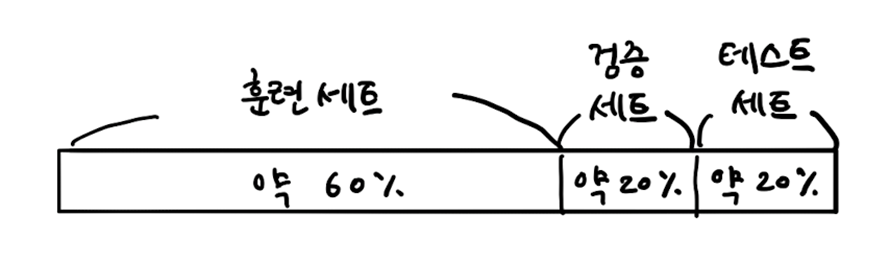

In [1]:
# 검증세트
# 테스트 세트를 사용하지 않으려면 모델이 과대적합인지 과소적합인지 판단하기 어렵다
# 테스트 세트를 사용하지 않고 측정하는 간단한 방법은 훈련세트를 또 나누는 것이다.
# 훈련세트 60%, 검증세트 20%, 테스트세트 20% -> 실무에서 가장 많이 사용하는 기법

# 테스트 하고싶은 매개변수를 바꿔하면서 가장 좋은 모델이 나올 수 있음.
# 이 매개변수를 사용해 훈련세트와 검증세트를 합쳐 전체 훈련 데이터에서 모델을 다시 훈련함
# 마지막 테스트에서 최종 점수를 평가함
# 훈련세트에서 모델을 훈련하고 검증세트로 모델을 평가함.
# 마지막 세트에서 테스트세트를 이용해 최종 점수를 평가함.

In [4]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
# 훈련세트와 테스트 세트를 나눔
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42) # 20%
# 원본데이터 6497개 20% = train(5197) , test(1300)

# 검증세트 20% 생성
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

print(sub_input.shape, val_input.shape)
# 원래 5197개였던 훈련세트가 4157개로 줄고, 검증세트가 1040개가 됨

(4157, 3) (1040, 3)


In [6]:
# sub_input, sub_target과 val_input, val_target을 사용해 모델을 만들고 평가함.
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target) # 훈련

print(dt.score(sub_input, sub_target)) # 출력 99.71 ( 과대적합 )
print(dt.score(val_input, val_target)) # 검증 86.44%
# 매개변수를 바꿔서 더 좋은 모델을 찾아야 함

0.9971133028626413
0.864423076923077


In [9]:
# 검증세트를 만드느냐고 훈련 세트가 줄었음 . (이럴때 많은 데이터를 훈련하면 좋은 결과가 나옴)
# 교차 검증 : 검증 세트를 떼어내어 평가하는 과정을 여러번 반복함.
# [훈련세트, 훈련세트, 검증세트]
# [훈련세트, 검증세트, 훈련세트]
# [검증세트, 훈련세트, 훈련세트] -> 패리티 방식(3-폴드 교차 검증)
# 5-폴드, 10-폴드도 있음
# 사이킷런에는 cross_validate()라는 교차 검증 함수를 사용

from sklearn.model_selection import cross_validate
# 평가할 모델 객체를 첫 번째 매개변수로 전달함(직접 검증세트를 떼지 않고 훈련세트 전체를 전달함)
scores = cross_validate(dt, train_input, train_target)
# scores = cross_validate(dt, train_input, train_target, cv=5)
# cv 매개변수를 이용해 폴드 수를 변경함 cv=5(기본값)
print(scores)
# fit_time(훈련시간), score_time(검증시간), test_score(최종점수) 키를 가진 딕셔너리(k : v)를 반환함

{'fit_time': array([0.0094018 , 0.00837946, 0.00882053, 0.00849891, 0.00851083]), 'score_time': array([0.00171065, 0.00120568, 0.0012958 , 0.00123596, 0.00123215]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [ ]:
# {'fit_time: 훈련시간 ':  array([0.04730606, 0.03037739, 0.03616309, 0.01887298, 0.02632165])
# 'score_time: 검증시간 '  : array([0.00237012, 0.0017314 , 0.00166559, 0.00913453, 0.01122403])
# 'test_score: 검증점수  ' : array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}

In [11]:
import numpy as np

print(np.mean(scores['test_score'])) # test_score 이름이지만 검증폴드의 점수임
# 5개의 검증 점수를 평균내어 최종 점수를 얻는다 85.53%

0.855300214703487


In [16]:
# 주의 : cross_validate()는 훈련세트를 섞어서 폴드를 나누지 않음 -> 분할기 사용(splitter)
# 앞서 우리는 train_test_split()함수로 전체 데이터를 섞은 후 훈련세트를 준비했음
# 만약 교차 검증을 할 때 훈련세트를 섞으려면 분할기(splliter)를 지정해야 한다.

# 사이킷런의 분할기는 교차검증에서 폴드를 어떻게 나눌지 결정함
# cross_validate()는 기본적으로 회귀모델인 KFold 분할기를 사용함
# 분류모델일 경우 타깃 클래스를 골고루 나누기 위해서 StratifiedKFold를 사용한다
from sklearn.model_selection import StratifiedKFold # 스트레이티파이드(계층화된)

# scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold()) # 아래 방법과 동일
splitter = StratifiedKFold()
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(scores)


{'fit_time': array([0.01167607, 0.01207876, 0.01288223, 0.01233768, 0.01197243]), 'score_time': array([0.00191617, 0.00186014, 0.00196528, 0.00194263, 0.00185752]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [14]:
# {'fit_time': array([0.01256347, 0.01217103, 0.01259589, 0.01239228, 0.01170969]),
#  'score_time': array([0.00206041, 0.00183487, 0.00191021, 0.00188422, 0.00189662]),
#  'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}
print(np.mean(scores['test_score'])) # 85.53%

0.855300214703487


In [19]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # 10-폴드 교차 검증 수행 n_splits
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(scores) # 10번의 교차검증이 진행
print(np.mean(scores['test_score'])) # 10번의 검증 평균 85.74%

{'fit_time': array([0.01819539, 0.01335835, 0.01383328, 0.01368046, 0.01328659,
       0.0134275 , 0.01328349, 0.01338983, 0.02034307, 0.01360297]), 'score_time': array([0.0017519 , 0.00175357, 0.00177813, 0.00179172, 0.00182104,
       0.00185418, 0.00176215, 0.00335383, 0.00559974, 0.00184679]), 'test_score': array([0.83461538, 0.87884615, 0.85384615, 0.85384615, 0.84615385,
       0.87307692, 0.85961538, 0.85549133, 0.85163776, 0.86705202])}
0.8574181117533719


In [20]:
# 결정트리의 매개변수 값을 바꿔가며 가장 좋은 성능이 나오는 모델을 찾아야 함
# 테스트 세트를 사용하지 않고 교차 검증을 통해서 좋은 모델을 골라야 함 => 이를 하이퍼 파라미터 튜닝이라고 함

# 하이퍼 파라미터 튜닝
# 모델 파라미터 : 머신런닝 모델이 학습하는 파라미터
# 하이퍼 파라미터 : 사용자가 지정해야만 하는 파라미터
# 하이퍼 파라미터 튜닝 : 라이브러리가 제공하는 기본값을 그대로 사용해 모델을 훈련
# 그 다음 검증세트의 점수나 교차 검증을 통해 매개변수를 조금씩 변경 1~2, 5~6개의 매개변수를 제공
# AutoML : 사람의 개입없이 하이퍼 파라미터 튜닝을 자동으로 수행하는 기술

# Max_depth를 최적으로 고정하고 min_sample_split을 바꿔가며 최적의 값을 찾는다면 값이 함께 변경됨
# -> 두 개의 매개변수를 동시에 바꿔가며 최적의 값을 찾아야 함 -> 다중 for문을 사용해야 됨(복잡해짐)
# 사이킷런에서 제공하는 그리드 서치(Grid Search)가 제공 GridSearchCV
# 그리드 서치 참고 https://everyday-joyful.tistory.com/m/entry/GridSearchCV-%EA%B5%90%EC%B0%A8-%EA%B2%80%EC%A6%9D-%ED%95%98%EC%9D%B4%ED%8D%BC-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0-%ED%8A%9C%EB%8B%9D%EC%9D%84-%ED%95%9C-%EB%B2%88%EC%97%90

In [26]:
from sklearn.model_selection import GridSearchCV # 그리드 서치 크로스 검증용
# min_inpurity_decrease 매개변수의 최적값을 찾아보자
# min_sample_split : 샘플이 최소한 몇 개 이상이어야 split(하위 노드로 분리) 할 것 인지
# 클수록 가지치기(과대적합 방지), 작을수록 정확하게(과대적합)
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]} #0.0001~증가 5번
# 매개변수와 탐색할 값의 리스트를 딕셔너리로 만듬

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
# 결정 트리 클래스의 객체를 생성하자마자 바로 전달 함
# 일반 모델을 훈련하는 것 처럼 fit()메서드를 호출 함
# 이 메서드를 호출하면 서치 객체는 결정 트리 모델 min_impurity_decrease값을 바꿔가면서 총 5번 수행
# GridSearchCV의 cv 매개변수 기본값은 5임 5*5 = 25번 수행
# n_jobs에서 병렬 실행에 사용될 CPU 코어수를 지정함 (-1로 사용 시 모든 코어)

gs.fit(train_input, train_target) # 스리드서치를 이용한 훈련 시작
# 교차 검증에서 최적의 하이퍼 파라미터를 찾으면 전체 훈련 세트로 모델을 다시 만들어야 하지만
# 사이킷런의 그리드 서치는 검증 점수가 가장 높은 모델의 매개변수 조합으로
# 전체 훈련 세트에서 자동으로 다시 모델을 훈련 함

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [29]:
# 이렇게 최적화되어 훈련된 모델은 GridSearchCV 클래스로 만들어진
# 객체의 best_estimator_ 속성에 저장되어 있다.
# 최적의 매개변수는 best_params_속성에 저장되어 있다.
print(f"그리드 서치를 통해 찾은 최적의 모델 정확도 : {dt.score(train_input, train_target)*100:.21}%")
# 그리드 서치를 통해 찾은 최적의 모델 정확도 : 97.06%

그리드 서치를 통해 찾은 최적의 모델 정확도 : 97.0559938426014952029%


In [31]:
print(f"최적의 매개변수 : {gs.best_params_}") # best_params_ 암기
# 각 매개변수에서 수행한 교차 검증의 평균 점수는 cv_results_속성의 'mean_test_score'키에 저장되어 있다.
# 최적의 매개변수 : {'min_impurity_decrease':0.0001}

최적의 매개변수 : {'min_impurity_decrease': 0.0001}


In [34]:
# 5번의 교차 검증으로 얻은 점수를 출력해보자
print(gs.cv_results_['mean_test_score']) # 첫 번째 값이 가장 큰 것 같다!
# [0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [39]:
# 눈으로 보는 것 보다 넘파이를 이용해 argmax()함수를 사용하면 가장 큰 값의 인덱스를 추출할 수 있다.
# 그 다음 이 인덱스를 사용해서 params키에 저장된 매개변수를 출력해보자.
# 이 값이 최상의 검증 점수를 만든 매개변수의 조합이 된다.
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index]) # 앞에서 출력한 best_params_와 같은지 확인

# 과정 요약
# 1. 탐색할 매개변수 지정
# 2. 훈련세트에서 그리드 서치를 수행하여 최시ㅏㅇ의 평균 검증 점수가 나오는 매개변수 조합을 찾음
#     -> 그리드 서치에 저장
#     3. 그리드 서치는 최상의 매개변수에서 전체 훈련 세트를 사용해 최종 모델을 훈련
#         -> 그리드 서치에 저장

{'min_impurity_decrease': 0.0001}


In [41]:
# 조금 더 복잡한 매개변수 조합을 써보자
# 노드를 분할하기 위한 불순도 감소 최소량 지정 max_depth(트리의 깊이)
# min_samples_split 노드를 나누기 위한 최소 샘플 수
# 넘파이 arange() 함수는 첫 번째 매개변수 값에서 시작해서
# 두 번째 매개변수에 도달할 때까지 세 번째 매개변수를 계속 더한 배열을 만듬

# 0.0001 ~ 0.001까지 0.0001을 더한 배열 (두 번째 매개변수는 포함되지 않음) = 9번
# 파이썬 range()함수는 정수만 사용 가능 5~20까지 1씩 증가 = 15개
# 교차 검증 회수 9*15*10=1350개 * 5(5폴드교차) = 6750개
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001), # 9번 }
          'max_depth':range(5, 20, 1),                               # 5~20까지 15번
          'min_samples_split':range(2, 100, 10) #분할 할 수 있는 샘플 수를 지정 2~100까지 10번
        }

# criterion : 분할 품질을 측정하는 기능 (default : gini)
# splitter : 각 노드에서 분할을 선택하는 데 사용되는 전략 (default : best)
# max_depth : 트리의 최대 깊이 (값이 클 수록 모델의 복잡도가 올라간다.)
# min_samples_split : 자식 노드를 분할하는데 필요한 최소 샘플 수 (default : 2)
# minmax_weight_fraction_leaf : min_sample_leaf와 같지만 가중치가 부열된 샘플 수에서의 비율
# max_features : 각 노드에서 분할에 사용할 특징의 최대 수
# random_state : 난수 seed 설정
# max_leaf_nodes : 리프 노드의 최대 수
# min_umpurity_decrease : 최소 불순도
# min_impuriry_split : 나무 성장을 멈추기 위한 임계치
# class_weight : 클래스 가중치
# presort : 데이터 정렬 필요 여부

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target) # 훈련 시작

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [53]:
print(gs.best_params_) # 최상의 매개변수 조합확인
# {'max_depth' : 14, 'min_impurity_decrease' : 0.0004, 'min_samples_split': 12}

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [54]:
print(np.max(gs.cv_results_['mean_test_score'])) # 최상의 교차 점수 확인
# 개선점 : 탐색할 매개변수 간격을 0.0001 혹은 1로 설정했는데 근거 부족(좁히거나 얾힐 필요성?)

0.8683865773302731


In [55]:
# 매개변수의 값이 수치일 때 값의 범위나 간격을 미리 정하기 어려울 수 있음
# 너무 많은 매개변수 조건이 있어 그리드 서치 수행시간이 오래 걸림
# 해결 : 랜덤 서치를 사용해보자

# 랜덤서치 : 매개변수 값의 목록을 전달하는 것이 아니라 매개변수를 샘플링할 수 있는 확률 분포도 객체를 전달
# 싸이파이 : 파이썬의 핵심 과학 라이브러리로 적분, 보간?, 선형대수, 확률 등 포함한 수치 계산용 전용 라이브러리 (코랩에 내장)

from scipy.stats import uniform, randint
# uniform, randint 클래스는 모두 주어진 범위에서 고르게 값을 뽑는다. (균등 분포에서 샘플링)
# randint()에서는 정수값을 추출, uniform()은 실수값을 뽑음

In [68]:
# 랜덤서치 테스트
rgen = randint(0, 10) # 10개 숫자를 샘플링(학생마다 다름)
rgen.rvs(10) # array([5, 0, 1, 0, 2, 5, 6, 5, 3, 3])

# 10개밖에 되지 않기 때문에 고르게 샘플링되는 것 같지 않지만 샘플링 숫자를 늘리면 쉽게 확인 할 수 있다

array([3, 9, 2, 8, 7, 1, 8, 9, 8, 5])

In [81]:
np.unique(rgen.rvs(1000), return_counts=True) # 100개를 샘플링해서 각 수자의 개수를 세어봄
# (array([0,    1,      2,      3,      4,      5,      6,      7,      8,      9]),
#  array([106,  106,    100,    88,     100,    88,     102,    102,    111,    97]))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([115,  85,  91, 100, 109, 108,  93, 103, 102,  94]))

In [82]:
ugen = uniform(0, 1) #실수형 테스트
ugen.rvs(10) # 난수발생기(랜덤과 유사)

array([0.09114074, 0.65626141, 0.7209693 , 0.76863317, 0.97838347,
       0.07776962, 0.74144702, 0.17972919, 0.87729969, 0.39551161])

In [83]:
# 탐색할 매개변수의 딕셔너리를 만들어 봄
# min_samples_leaf를 탐색 대상에 추가 (랜덤값을 하이퍼 파라미터 값으로 적용)
params = {'min_impurity_decrease' : uniform(0.0001, 0.001), # 0.00001~0.001의 실수 값
          'max_depth': randint(20, 50),                     # 20~50 사이의 정수
          'min_samples_split':randint(2, 25),               # 2~25 사이의 정수
          'min_samples_leaf': randint(1, 25),               # 1~25 사이의 정수
          # 리프 노드가 되기 위한 최소 샘플 개수(지식 노드의 샘플 수가 이 값보다 작으면 분할하지 않음)
          }

In [85]:
# 어차피 하이퍼 파라미터의 매개 값을 랜덤으로 하기로 했으니 검증하는 cv클래스도 랜덤용으로 사용해보자.
# 샘플링 횟수는 사이킷런의 랜덤 서치 클래스인 RandomizedSearchCV의 n_iter매개변수에 지정
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42)

#n_iter=100 총 100번을 샘플링하여 교차 검증을 수행(최적의 매개변수 조합을 찾음)

gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7deed9a8ced0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7deed9bea4d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7deedb8019d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7deee1217790>},
                   random_state=42)

In [87]:
print(gs.best_params_) #결과 최적의 매개변수 조합을 찾음
# {'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [90]:
print(np.max(gs.cv_results_['mean_test_score'])) # 최고의 교차 검증 점수 확인
                                                 # 86.95%

0.8695428296438884


In [92]:
dt = gs.best_estimator_
# 최종 모델로 결정하고 테스트 세트의 성능을 확인
print(dt.score(test_input, test_target)) # 검증점수 86.95%, 테스트 점수 86%

0.86


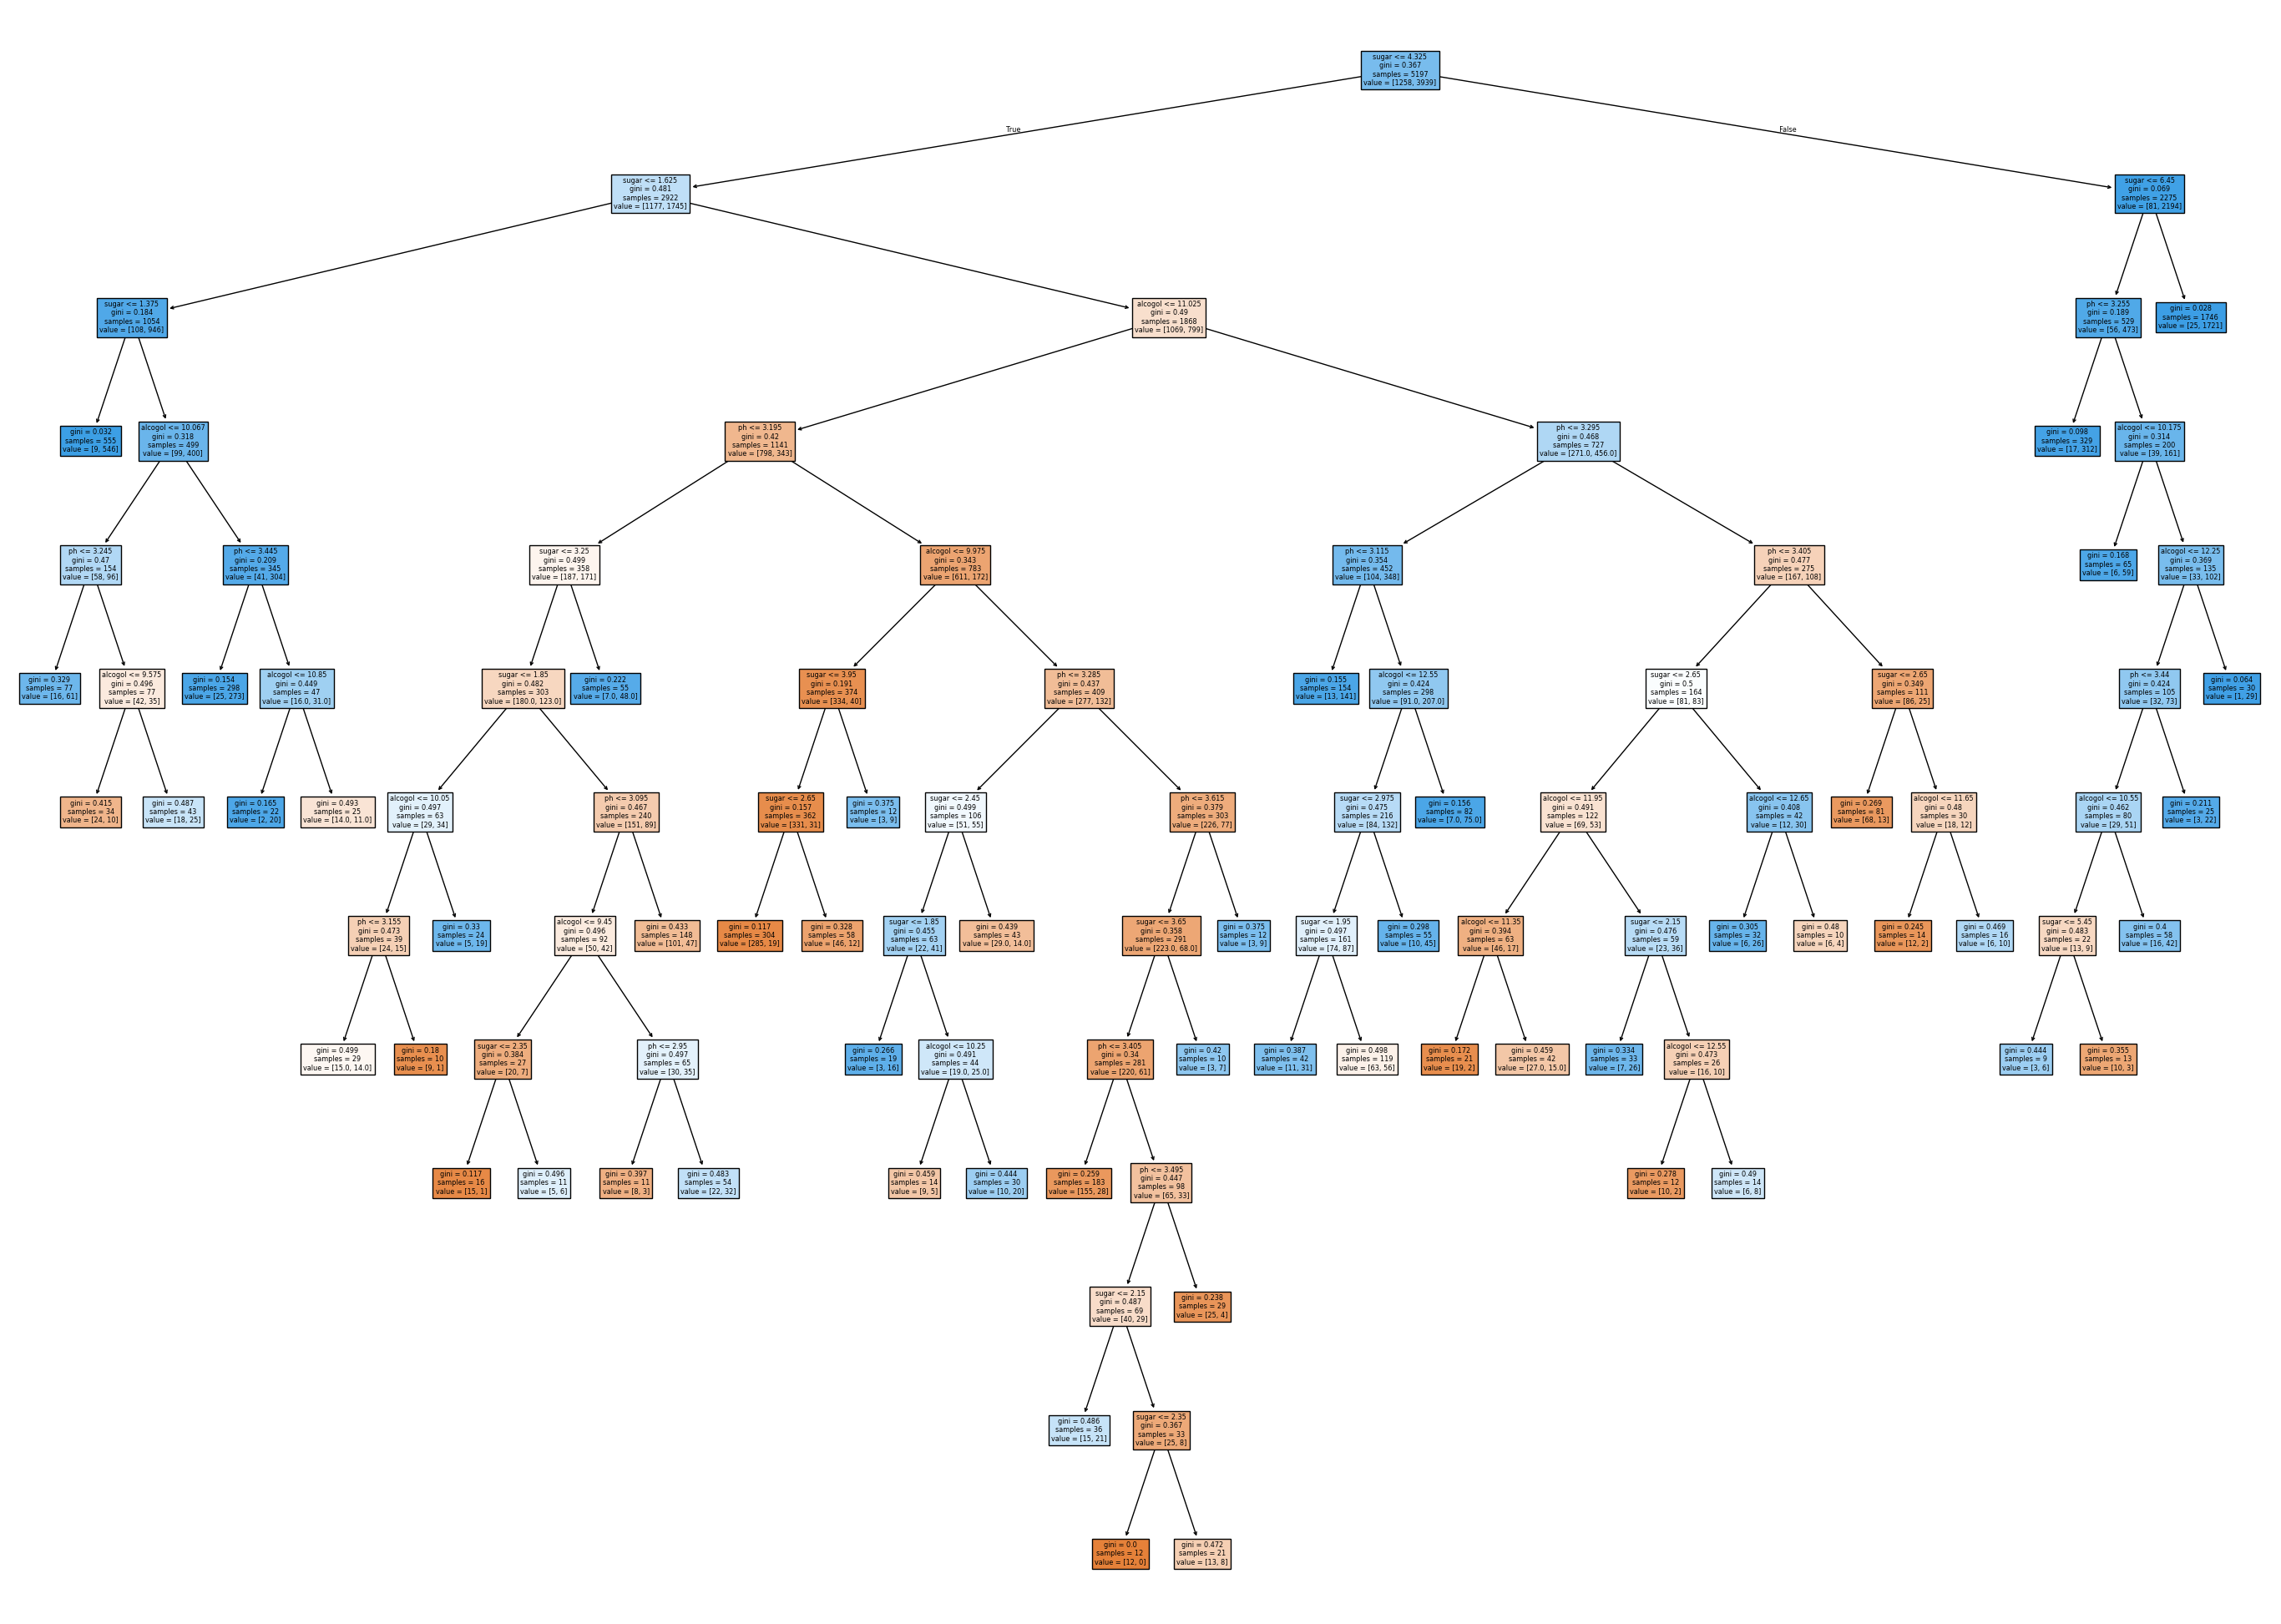

In [94]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(35,25))
plot_tree(dt, filled=True, feature_names=['alcogol', 'sugar', 'ph'])
plt.show()